In [11]:
from specpy import *
from Util.coordinates import *
from Util.datastructures import *
from Util.tile_util import *
from Util.imspector_util import *
from Util.dot_detection.Fiji_coordinate_detection import *
from Util.coordinate_util import *
from Util.dot_detection.Fiji_dummy import *
from Util.dot_detection.Fiji_coordinate_detection import read_coords
import pprint
from Util import datastructures, imspector_util
import time
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from scipy import ndimage, spatial, stats
from spot_util import *
%matplotlib inline

In [10]:
# make results dir
f = 'C:/Users//RESOLFT/Desktop/AUTOMATION/BACS/'
d = os.path.dirname(f)
if not os.path.exists(d):
    os.makedirs(d)

In [12]:
im = Imspector()

see = Settings()
see.load_from_file('C:/Users//RESOLFT/Desktop/ov.json')
coords = generate_grid_oop([0,0],[2e-3, 2e-3], [5e-5, 5e-5])
for c in coords:
    c.set_fov_len([5e-05, 5e-05, 1e-5])
   

#keep track of maximum z -> use that as next midplane
zpos = 0.0;
    
nm = datastructures.NameManagement(d)
nm.add_counter('field')
nm.add_counter('sted')

for c in coords:
    
    offset_old = c.get_scan_offset()
    offset_old[2] = zpos
    c.set_offset_coords(offset_old)
    
    see.set_to_coordinates(c)
    
    
    name = nm.get_next_image_name('field')
    acquire_measurement_dummy(im, see)
    ms = im.active_measurement()
    
    sites = single_finder(ms, pix_sig=3, threshold=0.02)
    
    co = c.copy()
    
    corner = middle2corner(c.get_scan_offset(), c.get_fov_len())
    pixelsd = get_pixel_size(ms)
    actual_coords = corner2spot(corner, sites, pixelsd)
    
    # update focus
    zpos += focus_in_stack(ms.stack(0).data(), pixelsd[2])    
    
    ms.save_as(name)
    im.close(ms)
    
    print(sites)
    
    see2 = Settings()
    see2.load_from_file('C:/Users//RESOLFT/Desktop/det_bac.json')
    
    nm.reset_counter('sted')
    
    for i in actual_coords:
        co.set_fov_len([3e-06, 3e-06, 3e-06])
        co.set_offset_coords(i)
        see2.set_to_coordinates(co)
        
        name = nm.get_next_image_name('sted')
        acquire_measurement_dummy(im, see2)
        
        ms = im.active_measurement()
        ms.save_as(name)
        im.close(ms)

[[216, 137, 3], [16, 39, 4], [25, 45, 5], [187, 256, 6], [18, 58, 7], [167, 303, 8]]
[[223, 295, 14], [260, 323, 17], [56, 10, 18], [92, 29, 18], [232, 297, 18], [138, 80, 19], [136, 110, 19], [127, 285, 19], [99, 107, 22], [272, 119, 22], [111, 279, 22], [143, 315, 22]]
[[185, 160, 8], [178, 191, 9], [66, 52, 12], [190, 201, 12], [212, 116, 13], [215, 84, 15], [107, 236, 16], [97, 231, 17], [113, 221, 27], [203, 91, 28], [58, 237, 30], [230, 129, 31], [304, 129, 33]]
[[131, 311, 18], [197, 203, 23], [281, 87, 30], [286, 94, 31], [223, 242, 33], [182, 320, 34], [308, 93, 38], [151, 295, 38]]
[[149, 314, 20], [72, 205, 35]]
[[196, 236, 14], [115, 53, 16], [76, 160, 16], [243, 31, 17], [201, 204, 18], [51, 189, 20], [285, 108, 21], [305, 117, 21], [109, 51, 23], [258, 30, 25], [262, 44, 27], [99, 190, 29], [107, 72, 31], [53, 194, 33], [202, 240, 33], [286, 136, 36]]


KeyboardInterrupt: 

[[208, 158, 2],
 [18, 44, 4],
 [53, 197, 4],
 [63, 211, 6],
 [235, 168, 7],
 [199, 137, 8],
 [77, 180, 8],
 [17, 39, 9],
 [216, 138, 9],
 [189, 258, 9]]

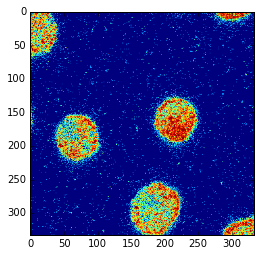

In [8]:
im = Imspector()
ms = im.active_measurement()
plt.imshow(skimage.exposure.equalize_hist(ms.stack(0).data())[0,0,:,:])
single_finder(ms, pix_sig=3, threshold=0.02)
#skimage.exposure.equalize_hist(ms.stack(0).data())